In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import torch
from torch.utils.data import DataLoader
import os
import pickle


In [37]:
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
folder = "USVND_dataset"

## работа с изначальными данными

In [13]:
list_scr = os.listdir(os.path.join(folder, "script_4"))

array([[<Axes: title={'center': 's_Vx'}>,
        <Axes: title={'center': 's_wz'}>],
       [<Axes: title={'center': 's_K'}>, <Axes: >]], dtype=object)

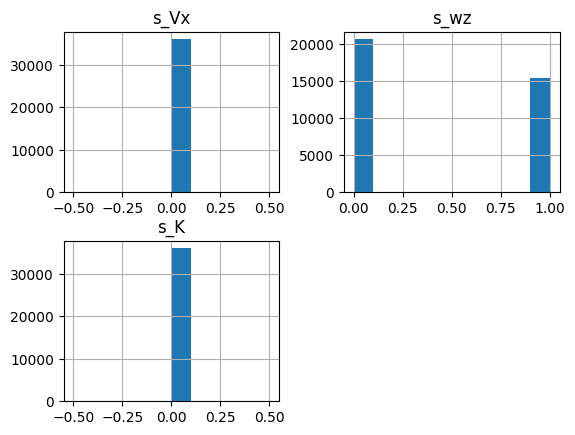

In [14]:
pd.read_csv(os.path.join(folder, "script_4", list_scr[0]))[['s_Vx', 's_wz', 's_K']].hist()

In [5]:
data_full = pd.DataFrame()
for fold in os.listdir(folder):
    for file in os.listdir(os.path.join(folder, fold)):
        data_full = pd.concat([data_full, pd.read_csv(os.path.join(folder, fold, file))])

In [15]:
data_full = pd.DataFrame()
for fold in ["script_4", "script_5", "script_6"]:
    for file in os.listdir(os.path.join(folder, fold)):
        data_full = pd.concat([data_full, pd.read_csv(os.path.join(folder, fold, file))])

In [16]:
data_full.to_csv("data_w_errors.csv")

In [7]:
data_full.columns

Index(['time', 'alpha', 'd_alpha', 'delta', 'd_delta', 'Vx_set', 'K_set', 'Vx',
       'Vy', 'wz', 'K', 'V_err', 'wz_err', 'K_err', 'd_K_err', 'Se', 'Sn',
       'Ba', 'Ka', 'Kw', 'Vk', 'gamma_a', 'omega_k', 'aw', 'd_aw', 's_Vx',
       's_wz', 's_K', 'f_Vx_add', 'f_wz_add', 'f_K_add', 'f_Vx_mult',
       'f_wz_mult', 'f_K_mult'],
      dtype='object')

 ## Работа с сохраненным датасетом

In [4]:
data_full = pd.read_csv("data_w_errors.csv")

In [17]:
data_t_t = data_full.drop(columns=["time",'f_Vx_add', 'f_wz_add', 'f_K_add', 'f_Vx_mult',
       'f_wz_mult', 'f_K_mult'])

In [18]:
X_train, X_test, Y_train, Y_test = (
    train_test_split(data_t_t.drop(columns=['s_Vx','s_wz', 's_K']),
                     data_t_t[['s_Vx', 's_wz', 's_K']])
)

In [10]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, Y_train)

RandomForestClassifier()

In [11]:
filename_model = 'RFmodel.pkl'
pickle.dump(modelRF, open(filename_model, 'wb')) 

In [12]:
result_RF = modelRF.predict(X_test)

In [13]:
modelNC = KNeighborsClassifier()
modelNC.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
filename_model = 'NCmodel.pkl'
pickle.dump(modelNC, open(filename_model, 'wb')) 

In [15]:
result_NC = modelNC.predict(X_test)

In [19]:
print(classification_report(Y_test, result_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    148102
           1       1.00      1.00      1.00    188891
           2       1.00      1.00      1.00    171590

   micro avg       1.00      1.00      1.00    508583
   macro avg       1.00      1.00      1.00    508583
weighted avg       1.00      1.00      1.00    508583
 samples avg       0.31      0.31      0.31    508583



In [20]:
print(classification_report(Y_test, result_NC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    148102
           1       1.00      1.00      1.00    188891
           2       1.00      1.00      1.00    171590

   micro avg       1.00      1.00      1.00    508583
   macro avg       1.00      1.00      1.00    508583
weighted avg       1.00      1.00      1.00    508583
 samples avg       0.31      0.31      0.31    508583



array([[<Axes: title={'center': 's_Vx'}>,
        <Axes: title={'center': 's_wz'}>],
       [<Axes: title={'center': 's_K'}>, <Axes: >]], dtype=object)

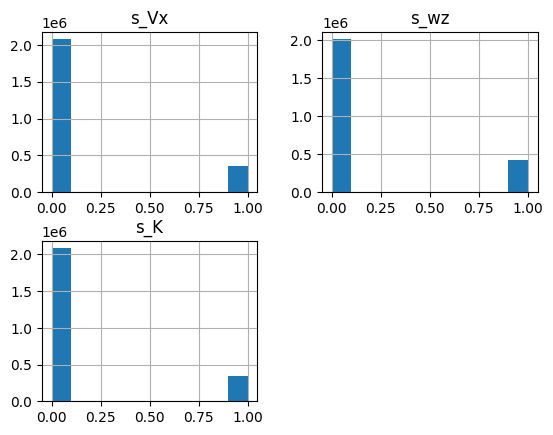

In [19]:
Y_train.hist()

array([[<Axes: title={'center': 's_Vx'}>,
        <Axes: title={'center': 's_wz'}>],
       [<Axes: title={'center': 's_K'}>, <Axes: >]], dtype=object)

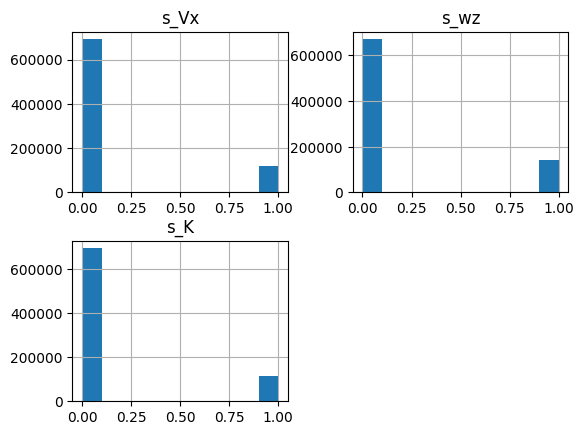

In [20]:
Y_test.hist()

## GridSearch

In [21]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [10, 20, 30, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [22]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='f1_samples', verbose=2)
CV_rfc.fit(X_train, Y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10; total time=   0.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10; total time=   0.6s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=20; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=20; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=20; total time=   0.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=20; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=20; total time=   0.4s
[CV] EN

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 50]},
             scoring='f1_samples', verbose=2)

In [23]:
CV_rfc.cv_results_

{'mean_fit_time': array([5.63896275e-01, 5.24879456e-01, 6.67742109e-01, 7.03151369e-01,
        8.35738566e+01, 1.53690359e+02, 2.32010349e+02, 3.86659025e+02,
        7.80686759e+01, 1.54599391e+02, 2.32145915e+02, 3.87635910e+02,
        2.59350300e-01, 2.61996794e-01, 2.59144831e-01, 2.62279558e-01,
        9.84363173e+01, 1.90915581e+02, 2.84858225e+02, 4.73248268e+02,
        9.70539277e+01, 1.88009312e+02, 2.84429746e+02, 4.74085903e+02,
        2.67232847e-01, 2.58426571e-01, 2.66886806e-01, 2.68860102e-01,
        1.13800500e+02, 2.26078384e+02, 3.35225466e+02, 5.60130998e+02,
        1.13511236e+02, 2.25596860e+02, 3.34580528e+02, 5.57941817e+02,
        2.61682415e-01, 2.57285738e-01, 2.57641506e-01, 2.60437536e-01,
        1.32243241e+02, 2.55426742e+02, 3.82583947e+02, 6.36176473e+02,
        1.29127031e+02, 2.55142646e+02, 3.80894216e+02, 6.37396796e+02,
        2.50581408e-01, 2.53842783e-01, 2.59956455e-01, 2.57792521e-01,
        1.44535288e+02, 2.87042349e+02, 4.29501

In [24]:
rfc_best = CV_rfc.best_params_

In [25]:
model_rfc=RandomForestClassifier(random_state=42,
                                 max_features=rfc_best["max_features"],
                                 n_estimators=rfc_best["n_estimators"],
                                 max_depth=rfc_best["max_depth"],
                                 criterion=rfc_best["criterion"])

In [27]:
filename_model = 'RFbestmodel.pkl'
pickle.dump(model_rfc, open(filename_model, 'wb')) 

In [29]:
model_rfc.fit(X=X_train, y=Y_train)
predRF_best = model_rfc.predict(X=X_test)

In [31]:
print(classification_report(Y_test, predRF_best))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79    118711
           1       0.99      0.49      0.66    140863
           2       0.92      0.62      0.74    116471

   micro avg       0.97      0.58      0.73    376045
   macro avg       0.97      0.59      0.73    376045
weighted avg       0.97      0.58      0.73    376045
 samples avg       0.27      0.27      0.27    376045



In [32]:
predRF_best

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [35]:
df_predRF = pd.DataFrame(data=predRF_best, columns=Y_test.columns)

In [ ]:
for column in Y_test.columns:
    plt.figure(figsize=(11,5))
    plt.plot(df_predRF[column])
    plt.plot(Y_test[column])
    plt.grid(visible=True)
